In [96]:
#library yang dibutuhkan
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats
import  matplotlib.pyplot  as  plt 

In [97]:
#membaca data
df = pd.read_csv('thyroidDF.csv')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [98]:
#menampilkan tipe data tiap fitur dari dataset
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [99]:
#menghapus duplikasi data
len(df['patient_id'])-len(df['patient_id'].drop_duplicates())

0

In [100]:
#menghapus fitur-fitur yang tidak diperlukan
df = df.drop(['patient_id','referral_source','query_on_thyroxine','TBG','TBG_measured','FTI_measured','TT4_measured','T4U_measured','TSH_measured','T3_measured','T3'],axis=1) 

In [101]:
#menghilangkan missing value atau data yang NaN
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7652 entries, 18 to 9157
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7652 non-null   int64  
 1   sex                  7652 non-null   object 
 2   on_thyroxine         7652 non-null   object 
 3   on_antithyroid_meds  7652 non-null   object 
 4   sick                 7652 non-null   object 
 5   pregnant             7652 non-null   object 
 6   thyroid_surgery      7652 non-null   object 
 7   I131_treatment       7652 non-null   object 
 8   query_hypothyroid    7652 non-null   object 
 9   query_hyperthyroid   7652 non-null   object 
 10  lithium              7652 non-null   object 
 11  goitre               7652 non-null   object 
 12  tumor                7652 non-null   object 
 13  hypopituitary        7652 non-null   object 
 14  psych                7652 non-null   object 
 15  TSH                  7652 non-null   

In [102]:
df.describe()

,age,TSH,TT4,T4U,FTI
count,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000
mean,78.827365,5.173127,108.827543,0.977814,112.890805
std,1296.169513,24.181834,37.419306,0.198786,36.970210
min,1.000000,0.005000,2.000000,0.170000,1.400000
25%,38.000000,0.437500,88.000000,0.860000,94.000000
50%,56.000000,1.300000,105.000000,0.960000,109.000000
75%,69.000000,2.700000,126.000000,1.062500,128.000000
max,65526.000000,530.000000,600.000000,2.330000,642.000000


In [103]:
#menghilangkan outlier yang mengganggu data
df = df[(np.abs(df['age']) < 100)]
df = df[(np.abs(stats.zscore(df['TSH'])) < 3)]
df = df[(np.abs(stats.zscore(df['FTI'])) < 3)]
df = df[(np.abs(stats.zscore(df['TT4'])) < 3)]

df.describe()

,age,TSH,TT4,T4U,FTI
count,7366.000000,7366.000000,7366.000000,7366.000000,7366.000000
mean,53.284958,2.963312,107.291610,0.973336,111.608892
std,18.770833,6.665299,30.103018,0.191846,28.833609
min,1.000000,0.005000,12.000000,0.170000,9.099999
25%,38.000000,0.500000,88.000000,0.860000,94.000000
50%,56.000000,1.400000,104.000000,0.960000,109.000000
75%,69.000000,2.600000,125.000000,1.060000,127.000000
max,97.000000,77.000000,204.000000,2.330000,221.000000


In [104]:
#mengambil kelas pada kolom target
df['target'].unique()

array(['F', '-', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'L', 'Q', 'J', 'C|I',
       'O', 'A', 'H|K', 'GK', 'MI', 'KJ', 'P', 'FK', 'B', 'MK', 'GI', 'C',
       'GKJ', 'OI'], dtype=object)

In [105]:
#mengubah sting menjadi int 
diagnoses = {'-': '0',
             'A': '1', 
             'B': '1', 
             'C': '1', 
             'D': '1',
             'E': '2', 
             'F': '2', 
             'G': '2', 
             'H': '2'}

#memperbarui data dengan nilai-nilai yang sudah di mapping
df['target'] = df['target'].map(diagnoses)
df.dropna(subset=['target'], inplace=True)

df['target'].unique()

array(['2', '0', '1'], dtype=object)

In [106]:
#mengganti sting menjadi int
df.replace('f', 0, inplace=True)
df.replace('t', 1, inplace=True)

df.replace('M', 0, inplace=True)
df.replace('F', 1, inplace=True)

#ekspor data bersih ke file baru
df.to_csv("dataBersih.csv", index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6056 entries, 18 to 9156
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  6056 non-null   int64  
 1   sex                  6056 non-null   int64  
 2   on_thyroxine         6056 non-null   int64  
 3   on_antithyroid_meds  6056 non-null   int64  
 4   sick                 6056 non-null   int64  
 5   pregnant             6056 non-null   int64  
 6   thyroid_surgery      6056 non-null   int64  
 7   I131_treatment       6056 non-null   int64  
 8   query_hypothyroid    6056 non-null   int64  
 9   query_hyperthyroid   6056 non-null   int64  
 10  lithium              6056 non-null   int64  
 11  goitre               6056 non-null   int64  
 12  tumor                6056 non-null   int64  
 13  hypopituitary        6056 non-null   int64  
 14  psych                6056 non-null   int64  
 15  TSH                  6056 non-null   

PEMODELAN DATA MENGGUNAKAN SVM

In [107]:
#membagi data menjadi x (fitur) dan y (target)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [108]:
#membagi data x dan y menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [110]:
#svm dengan kernel RBF
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

In [111]:
# classifier.score(X_test,y_test)

acc = (classifier.score(X_train , y_train)*100)
print(f'Akurasi Data Latih {acc:.2f}')

acc =(classifier.score(X_test , y_test)*100)
print(f'Akurasi Data Uji {acc:.2f}')

Akurasi Data Latih 97.46
Akurasi Data Uji 97.11


In [112]:
#memprediksi hasil data uji
y_pred = classifier.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix SVM')

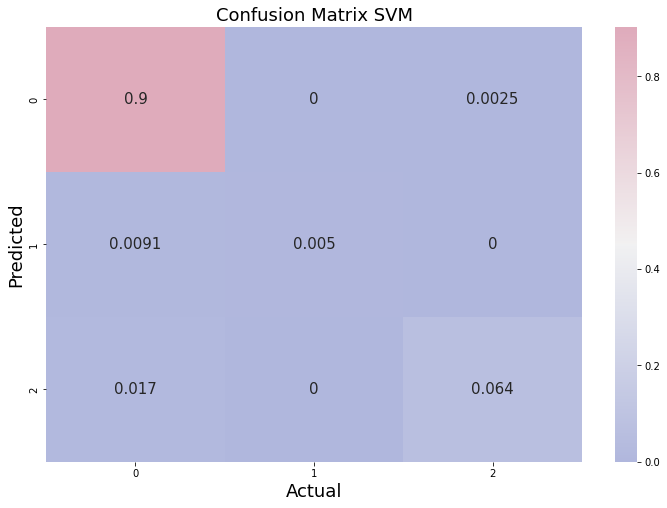

In [113]:
# confusion matrix

from sklearn.metrics import confusion_matrix


cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})
plt.ylabel('Predicted', fontsize=18)
plt.xlabel('Actual', fontsize=18)
plt.title('Confusion Matrix SVM', fontsize=18)

In [114]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1097
           1       1.00      0.35      0.52        17
           2       0.96      0.79      0.87        98

    accuracy                           0.97      1212
   macro avg       0.98      0.71      0.79      1212
weighted avg       0.97      0.97      0.97      1212

